In [39]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import yfinance as yf


import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime


import warnings
warnings.filterwarnings('ignore')

In [40]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] =yf.download(stock, start=start,end=end, progress=False)

In [69]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "AMAZON","MICROSOFT"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,,
2022-02-03,2834.750000,2884.949951,2766.659912,2776.909912,2776.909912,11276600,MICROSOFT,2879.771997,3047.985010,3278.370215,-0.078128
2022-02-04,3112.129883,3224.000000,3012.159912,3152.790039,3152.790039,12640500,MICROSOFT,2909.764990,3042.370508,3269.825215,0.135359
2022-02-07,3170.399902,3253.820068,3145.000000,3158.709961,3158.709961,5131200,MICROSOFT,2936.547998,3037.752002,3261.391216,0.001878
2022-02-08,3135.010010,3235.850098,3111.010010,3228.270020,3228.270020,3802000,MICROSOFT,2979.403003,3037.679504,3255.865415,0.022022
2022-02-09,3257.469971,3276.689941,3205.000000,3223.790039,3223.790039,3439300,MICROSOFT,3024.037012,3033.507007,3249.109814,-0.001388
2022-02-10,3167.000000,3214.330078,3155.000000,3180.070068,3180.070068,3413400,MICROSOFT,3062.769019,3027.303516,3242.569814,-0.013562
2022-02-11,3162.689941,3180.000000,3054.679932,3065.870117,3065.870117,3851600,MICROSOFT,3081.400024,3019.383020,3235.012817,-0.035911
2022-02-14,3035.020020,3168.969971,3033.000000,3103.340088,3103.340088,4022000,MICROSOFT,3092.587036,3012.412024,3228.332417,0.012222
2022-02-15,3152.110107,3160.139893,3092.750000,3130.209961,3130.209961,2822000,MICROSOFT,3103.221021,3010.005017,3223.140815,0.008658


In [42]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,255.000000,255.000000,255.000000,255.000000,255.000000,2.550000e+02
mean,145.436275,146.975138,144.006274,145.546941,145.085689,8.951694e+07
std,17.254608,17.563412,17.052825,17.324368,17.504508,2.855441e+07
min,119.029999,120.400002,116.209999,116.360001,115.672501,2.908339e+07
25%,130.090004,131.074997,129.005005,130.285004,129.630661,6.907255e+07
50%,145.529999,146.949997,144.580002,145.860001,145.452133,8.492240e+07
75%,154.985001,156.574997,153.519997,154.705002,154.282982,1.052436e+08
max,182.630005,182.940002,179.119995,182.009995,181.778397,1.954327e+08


In [43]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 255 entries, 2021-02-16 to 2022-02-16
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          255 non-null    float64
 1   High          255 non-null    float64
 2   Low           255 non-null    float64
 3   Close         255 non-null    float64
 4   Adj Close     255 non-null    float64
 5   Volume        255 non-null    int64  
 6   company_name  255 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.9+ KB


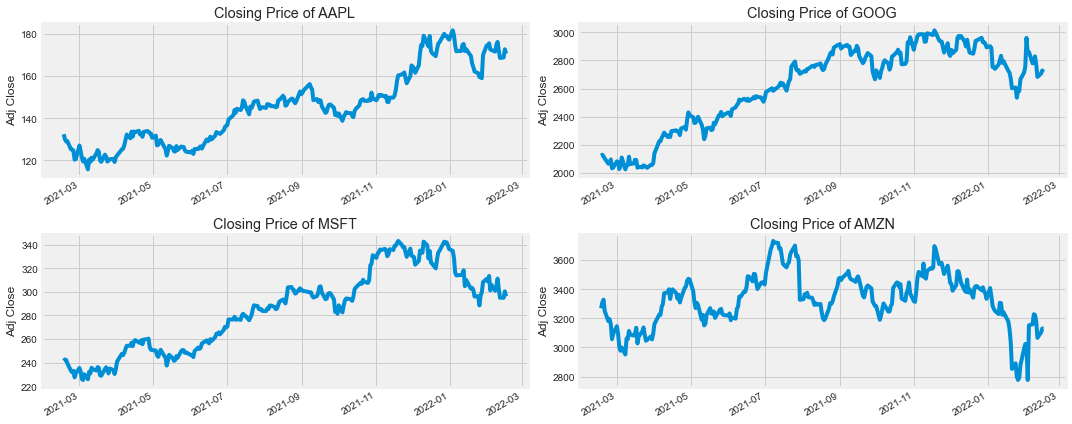

In [44]:
# Let's see a historical view of the closing price


plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

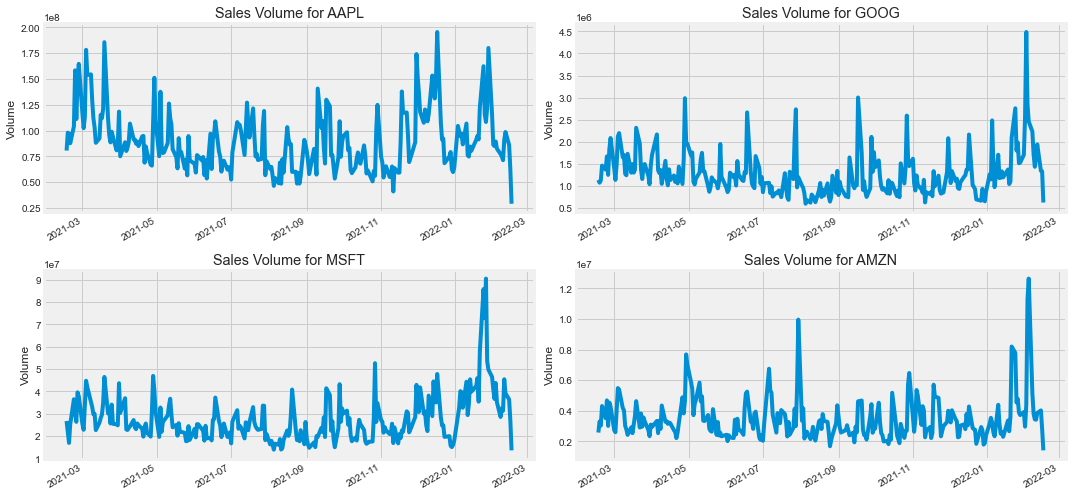

In [45]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

In [46]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

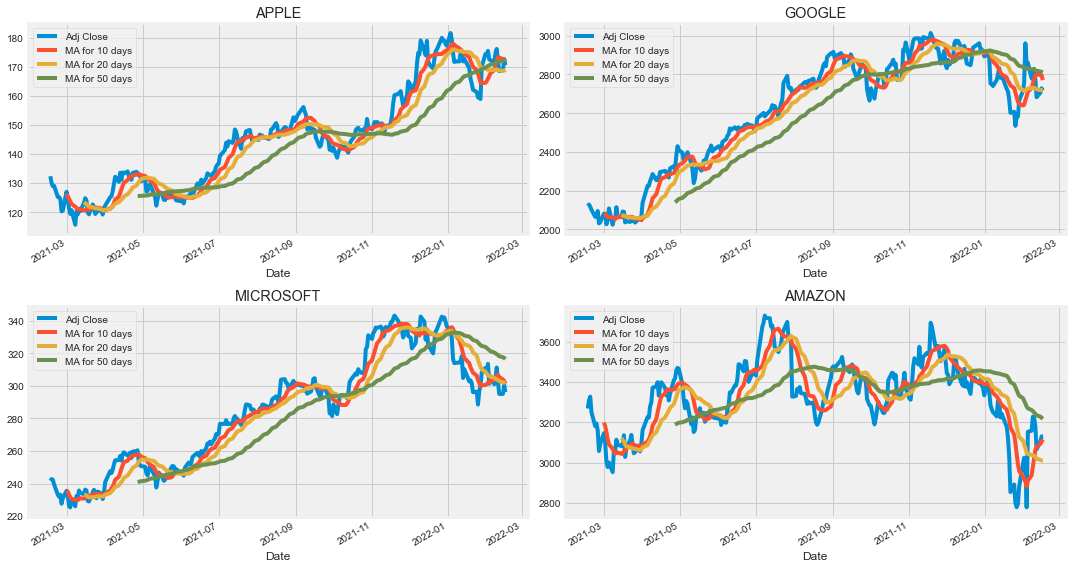

In [47]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

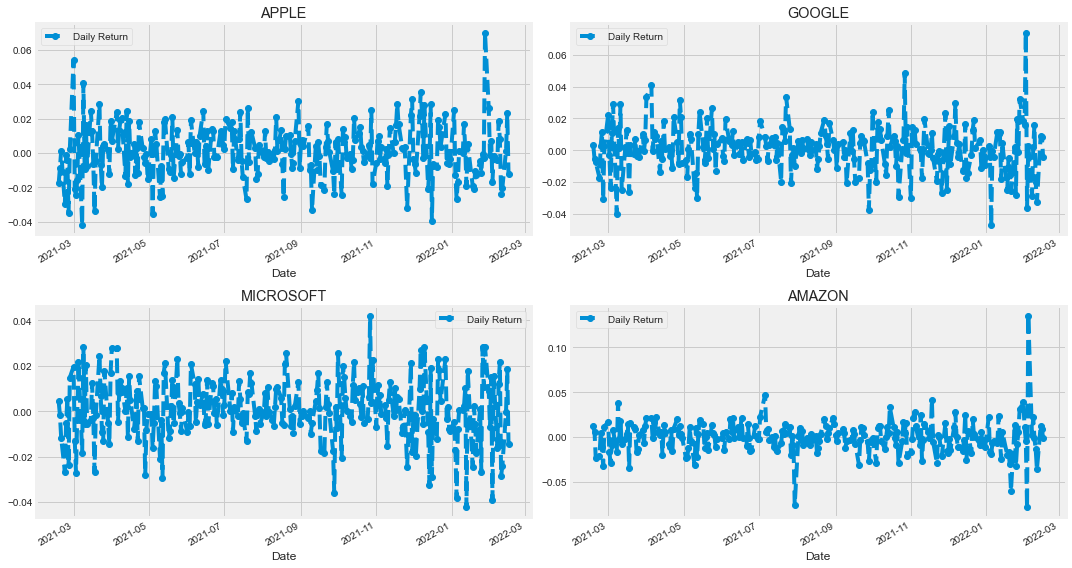

In [48]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

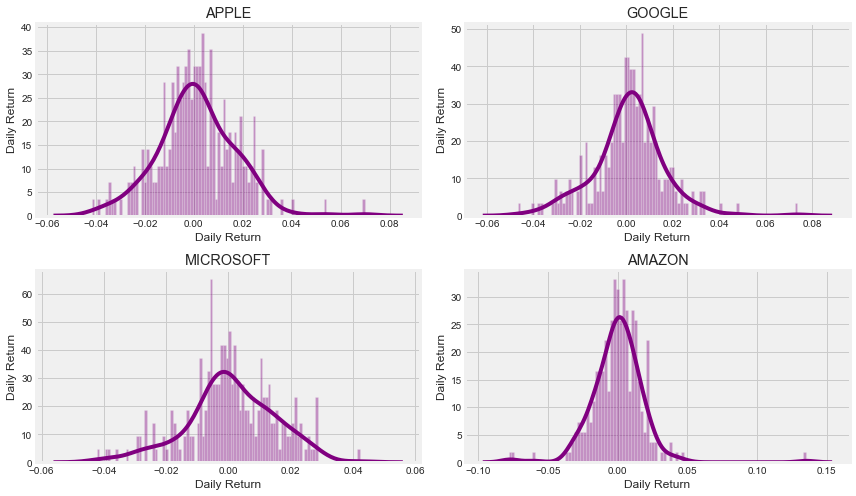

In [49]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
# Could have also done:
#AAPL['Daily Return'].hist()
plt.tight_layout()

In [50]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = yf.download(tech_list, start, end,progress=False)['Adj Close']

# Let's take a quick look
closing_df.head() 

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2021-02-16,132.403061,3268.949951,2121.899902,241.674210
2021-02-17,130.066940,3308.639893,2128.310059,242.727814
2021-02-18,128.943619,3328.229980,2117.199951,242.320282
2021-02-19,129.102676,3249.899902,2101.139893,239.517288
2021-02-22,125.255554,3180.739990,2064.879883,233.096237


In [51]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2021-02-16,NaN,NaN,NaN,NaN
2021-02-17,-0.017644,0.012141,0.003021,0.004360
2021-02-18,-0.008636,0.005921,-0.005220,-0.001679
2021-02-19,0.001234,-0.023535,-0.007586,-0.011567
2021-02-22,-0.029799,-0.021281,-0.017257,-0.026808


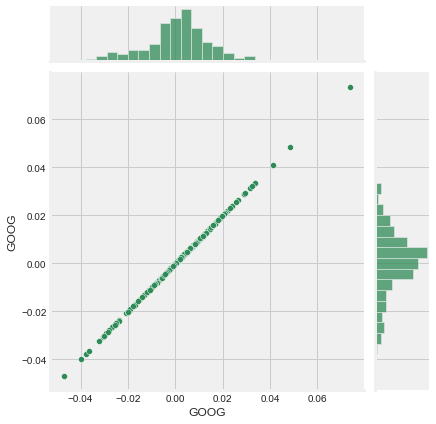

In [52]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

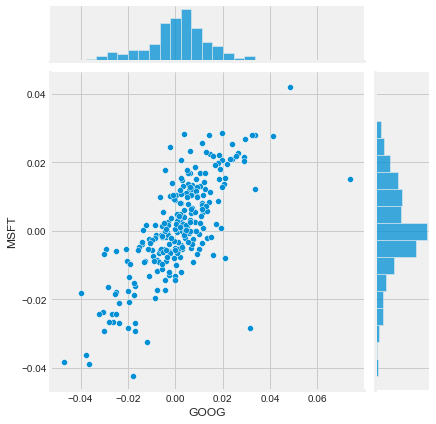

In [53]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter')

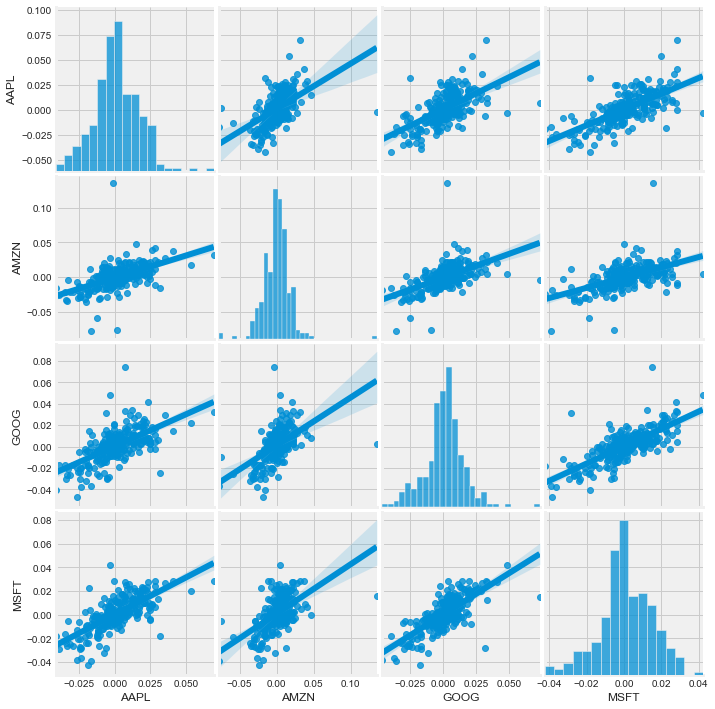

In [54]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')


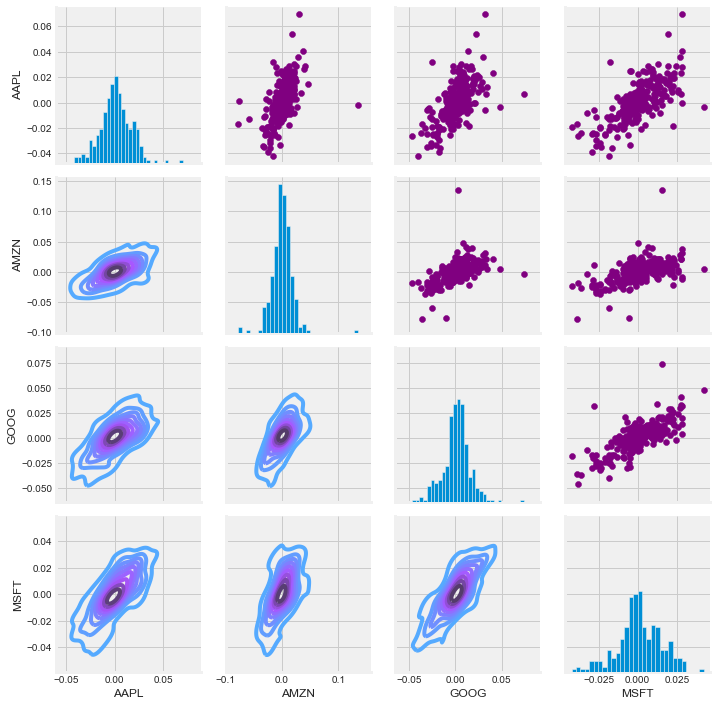

In [55]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

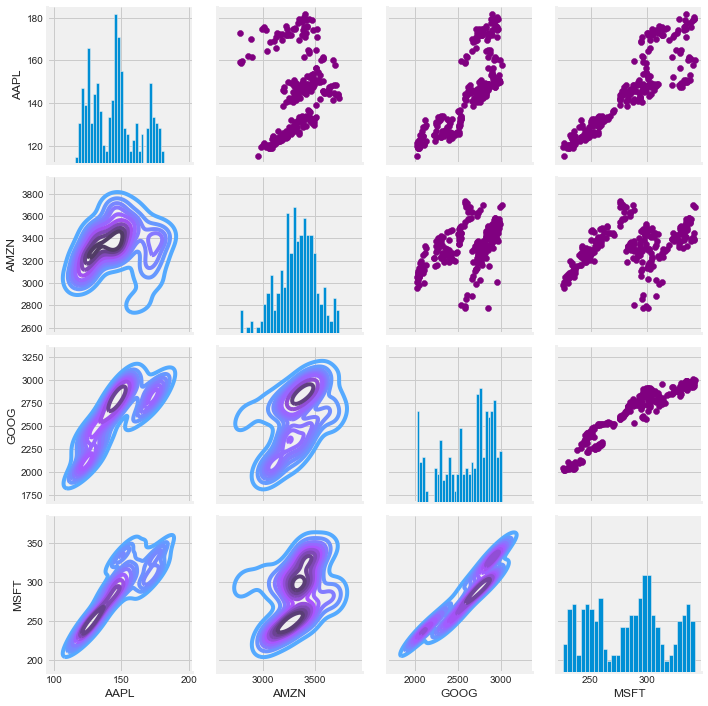

In [56]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:>

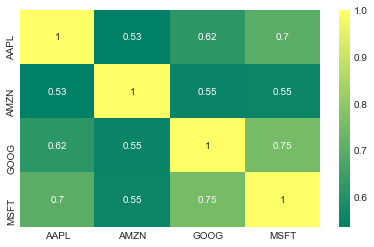

In [57]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

<AxesSubplot:>

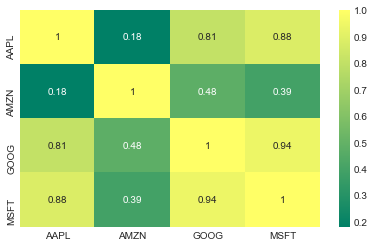

In [58]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

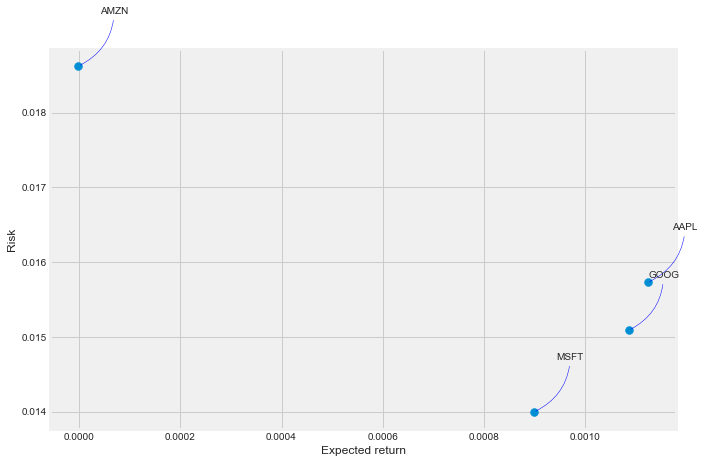

In [59]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [60]:
# Get the stock quote
df = yf.download('AMZN', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,175.889999,179.479996,175.550003,179.029999,179.029999,5110800
2012-01-04,179.210007,180.500000,176.070007,177.509995,177.509995,4205200
2012-01-05,175.940002,178.250000,174.050003,177.610001,177.610001,3809100
2012-01-06,178.070007,184.649994,177.500000,182.610001,182.610001,7008400
2012-01-09,182.759995,184.369995,177.000000,178.559998,178.559998,5056900
...,...,...,...,...,...,...
2022-02-10,3167.000000,3214.330078,3155.000000,3180.070068,3180.070068,3413400
2022-02-11,3162.689941,3180.000000,3054.679932,3065.870117,3065.870117,3851600
2022-02-14,3035.020020,3168.969971,3033.000000,3103.340088,3103.340088,4022000


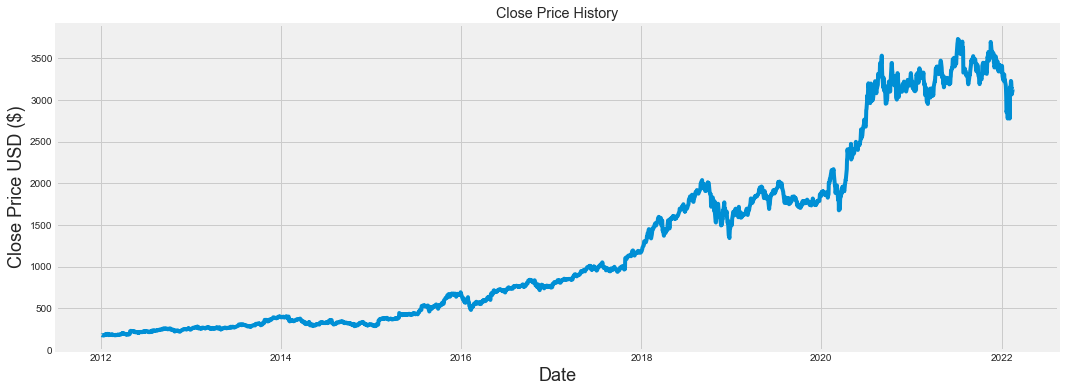

In [61]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [62]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2422

In [63]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data


array([[8.71895264e-04],
       [4.44384968e-04],
       [4.72512283e-04],
       ...,
       [8.23351604e-01],
       [8.30908917e-01],
       [8.30464510e-01]])

In [64]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.0008719 , 0.00044438, 0.00047251, 0.00187879, 0.0007397 ,
       0.00095908, 0.00083533, 0.        , 0.00070033, 0.0016116 ,
       0.00379977, 0.00520886, 0.00421884, 0.00285756, 0.00311351,
       0.00333851, 0.00489105, 0.00546762, 0.00456197, 0.00520605,
       0.00099284, 0.00162847, 0.00330476, 0.00202786, 0.00232318,
       0.002686  , 0.00254537, 0.00270287, 0.00440447, 0.00432291,
       0.00240193, 0.00112502, 0.00184785, 0.00178035, 0.00130784,
       0.00083252, 0.00090002, 0.00073127, 0.00221349, 0.00105753,
       0.00115596, 0.00094784, 0.00121784, 0.00145128, 0.00220505,
       0.00329351, 0.00235974, 0.00209817, 0.00243568, 0.00178035,
       0.00239068, 0.00256506, 0.00269725, 0.0046126 , 0.00444385,
       0.00463229, 0.0053748 , 0.00757704, 0.00829987, 0.00709609])]
[0.008066423825883726]

[array([0.0008719 , 0.00044438, 0.00047251, 0.00187879, 0.0007397 ,
       0.00095908, 0.00083533, 0.        , 0.00070033, 0.0016116 ,
       0.00379977, 0.00520886, 0.0

In [65]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2362/2362 [==============================] - 53s 21ms/step - loss: 0.0013


In [66]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

130.91129823438794

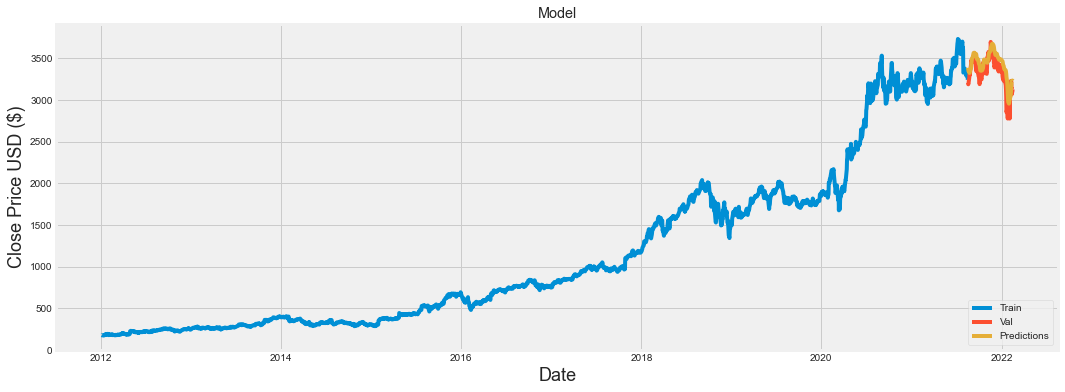

In [67]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [68]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-08-18,3201.219971,3386.236328
2021-08-19,3187.750000,3366.952148
2021-08-20,3199.949951,3345.613281
2021-08-23,3265.870117,3328.089355
2021-08-24,3305.780029,3324.271484
...,...,...
2022-02-10,3180.070068,3194.364746
2022-02-11,3065.870117,3228.106689
2022-02-14,3103.340088,3233.270508
